### 2. 정형 데이터마이닝

![title](images/test3-1-1.png)

![title](images/test3-2-2.png)

In [19]:
import pandas as pd

df = pd.read_csv("data/모의고사 3회/BlackFriday.csv")

for col in ["Product_Category_2", "Product_Category_3"]:
    df.loc[(df[col].isnull()), col] = 0
    
df["Product_all"] = df["Product_Category_1"] + df["Product_Category_2"] + df["Product_Category_3"]
df2 = pd.get_dummies(df, columns = ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years"])
df2

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all,Gender_F,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,10,0,3,0.0,0.0,8370,3.0,1,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,6.0,14.0,15200,21.0,1,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,0.0,0.0,1422,12.0,1,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,14.0,0.0,1057,26.0,1,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,0.0,0.0,7969,8.0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,16,0,1,2.0,0.0,11664,3.0,0,...,0,0,0,0,1,0,1,0,0,0
537573,1004737,P00111142,16,0,1,15.0,16.0,19196,32.0,0,...,0,0,0,0,1,0,1,0,0,0
537574,1004737,P00345942,16,0,8,15.0,0.0,8043,23.0,0,...,0,0,0,0,1,0,1,0,0,0
537575,1004737,P00285842,16,0,5,0.0,0.0,7172,5.0,0,...,0,0,0,0,1,0,1,0,0,0


![title](images/test3-2-3.png)

In [64]:
cols = df2.columns.to_list()
# print(cols)
remove_cols = ["User_ID", "Product_ID", "Product_all"] #다른 변수들은 dummy변수화하면서 자동으로 삭제되어 버림
for col in remove_cols:
#     print(col)
    cols.remove(col)
print(cols)
df3 = df2[cols]
df3

['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A', 'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+']


,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,0.0,0.0,8370,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,0.0,0.0,1422,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,0.0,1057,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,0.0,0.0,7969,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,16,0,1,2.0,0.0,11664,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
537573,16,0,1,15.0,16.0,19196,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
537574,16,0,8,15.0,0.0,8043,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
537575,16,0,5,0.0,0.0,7172,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#엘보우 기법을 사용해 최적 갯수를 찾는다.
sse = []
cluster_range = range(2, 16)
for i in cluster_range:
    print("{}개로 클러스터링 중...".format(i), end="\r")
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df3)
    sse.append(kmeans.inertia_)
print("\n클러스터링 완료")

15개로 클러스터링 중...
클러스터링 완료


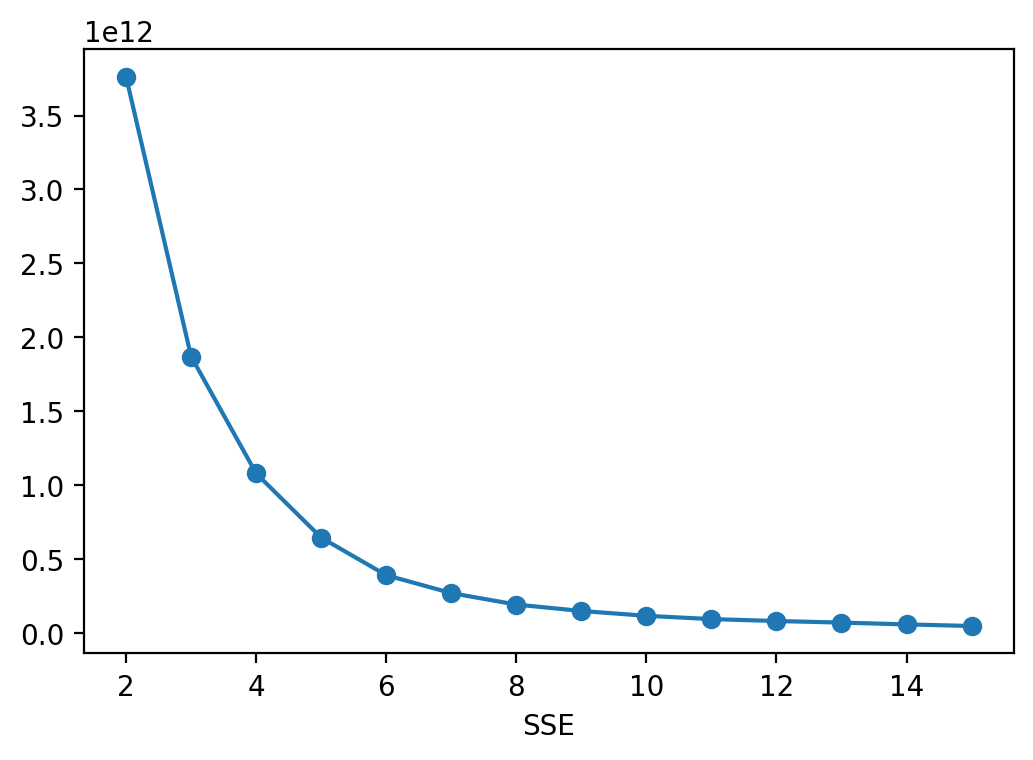

In [50]:
plt.figure(dpi=200)
plt.plot(cluster_range, sse, marker="o")
plt.xlabel("Cluster n")
plt.xlabel("SSE")
plt.show()
#대략 6 즈음에서 완만해 지는 듯 하다. 최적 갯수는 6으로 결정!

In [65]:
#6개로 다시 클러스터링해 본 다음 중심점을 본다.
kmeans = KMeans(n_clusters = 6)
kmeans.fit(df3)
kmeans.cluster_centers_

array([[7.93107105e+00, 4.04253564e-01, 6.95454224e+00, 6.75226817e+00,
        2.70322847e+00, 2.91237930e+03, 2.56262519e-01, 7.43737481e-01,
        3.37692942e-02, 1.98291505e-01, 4.05620361e-01, 1.90031813e-01,
        7.94627077e-02, 5.93142453e-02, 3.35100742e-02, 2.98904206e-01,
        4.34169907e-01, 2.66925887e-01, 1.37162719e-01, 3.55331684e-01,
        1.82726523e-01, 1.72640509e-01, 1.52138565e-01],
       [8.34094085e+00, 4.05847619e-01, 3.13308893e+00, 7.19356341e+00,
        7.01212495e+00, 1.57658881e+04, 1.94239524e-01, 8.05760476e-01,
        2.36789519e-02, 1.76029569e-01, 4.01565575e-01, 2.07701669e-01,
        8.14940577e-02, 7.19533633e-02, 3.75768139e-02, 2.39584116e-01,
        4.16800637e-01, 3.43615247e-01, 1.31045570e-01, 3.48663552e-01,
        1.90212900e-01, 1.76014544e-01, 1.54063434e-01],
       [8.00652609e+00, 4.06753731e-01, 6.03367996e+00, 6.53603394e+00,
        1.80143086e+00, 6.16548748e+03, 2.71989535e-01, 7.28010465e-01,
        2.62152354e-02

![title](images/test3-2-4.png)

In [71]:
#라벨링을 한다
labels = kmeans.predict(df3)
df4 = df.copy()
df4["clust"] = labels
df4

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all,clust
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0,5
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,21.0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,12.0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,26.0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,8.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,0.0,11664,3.0,4
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196,32.0,3
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,0.0,8043,23.0,5
537575,1004737,P00285842,M,36-45,16,C,1,0,5,0.0,0.0,7172,5.0,2


In [74]:
#각 군집별 레코드의 갯수는?
for i in range(0, 6):
    print("{}번 군집에 속한 레코드의 갯수 : {}".format(i, len(df4.loc[(df4.clust == i)])))

0번 군집에 속한 레코드의 갯수 : 84669
1번 군집에 속한 레코드의 갯수 : 66557
2번 군집에 속한 레코드의 갯수 : 135483
3번 군집에 속한 레코드의 갯수 : 43427
4번 군집에 속한 레코드의 갯수 : 68514
5번 군집에 속한 레코드의 갯수 : 138927


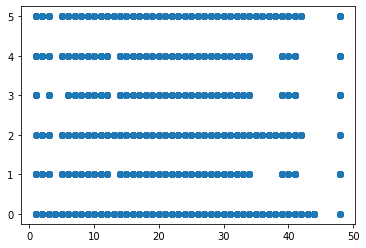

In [80]:
plt.scatter(df4["Product_all"], df4["clust"])